In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
df .head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [3]:
df['Rating'] = df['Rating'].astype(float)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [5]:
df.describe()

,Rating
count,2.405376e+07
mean,3.599634e+00
std,1.086118e+00
min,1.000000e+00
25%,3.000000e+00
50%,4.000000e+00
75%,4.000000e+00
max,5.000000e+00


In [6]:
df.shape

(24058263, 2)

In [7]:
ratings_count = df.groupby('Rating')['Rating'].count()
ratings_count

Rating
1.0    1118186
2.0    2439073
3.0    6904181
4.0    8085741
5.0    5506583
Name: Rating, dtype: int64

In [8]:
ratings_count = pd.DataFrame(ratings_count)
ratings_count

,Rating
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [9]:
ratings_count.rename(columns = {'Rating':'Count'}, inplace = True)
ratings_count

,Count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [10]:
df.isnull().sum()

Cust_Id       0
Rating     4499
dtype: int64

In [11]:
movie_count=df.isnull().sum()[1]
movie_count

4499

In [12]:
customer_count=df['Cust_Id'].nunique()
customer_count

475257

In [13]:
customer_count=df['Cust_Id'].nunique()-movie_count
customer_count

470758

In [14]:
rating_count=df['Cust_Id'].count()-movie_count
rating_count

24053764

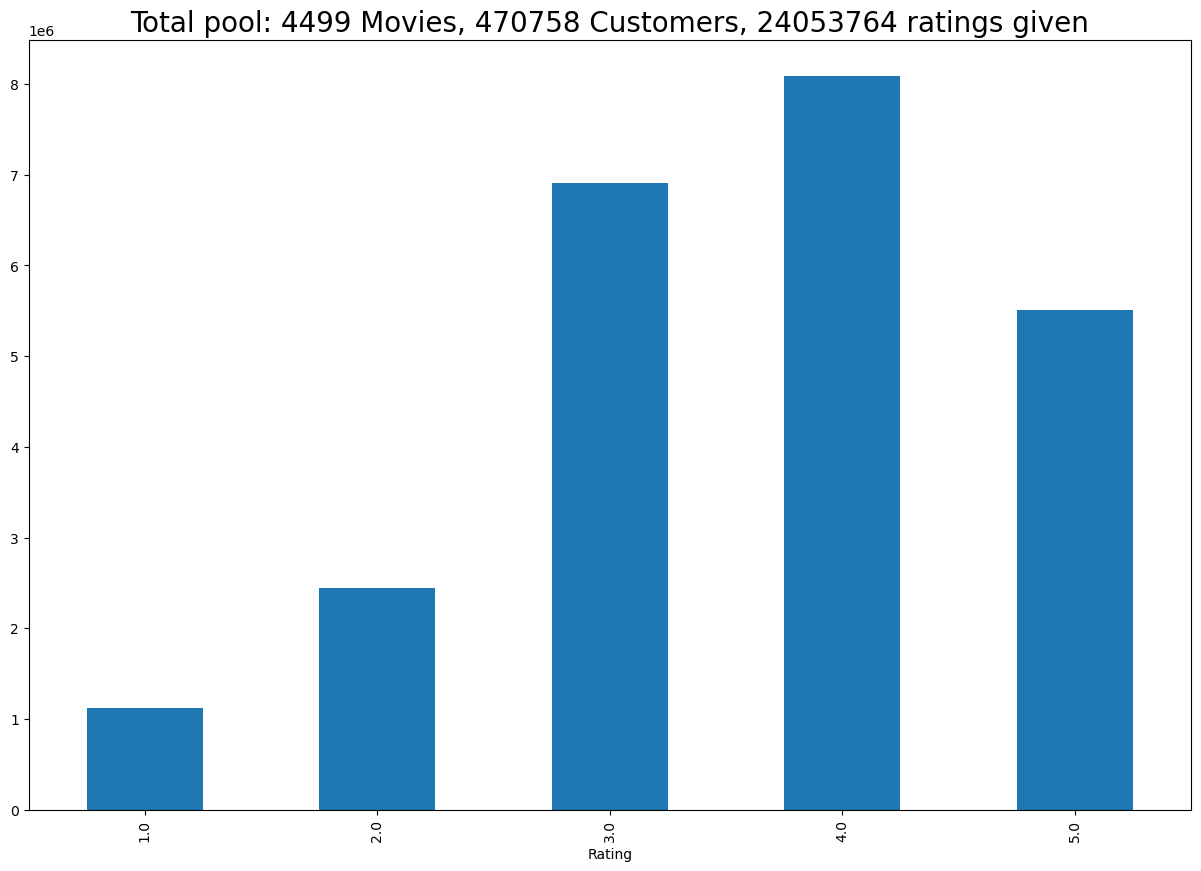

In [15]:
ax=ratings_count.plot(kind='bar', legend=False, figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=20)
plt.grid(False)

In [16]:
df_nan=pd.DataFrame(pd.isnull(df.Rating))
df_nan.head()

,Rating
0,True
1,False
2,False
3,False
4,False


In [17]:
df_nan=df_nan[df_nan['Rating']==True]
df_nan.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [18]:
df_nan.shape

(4499, 1)

In [19]:
df_nan=df_nan.reset_index()
df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [20]:
df_nan['index'][:-1]

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [21]:
x=zip(df_nan['index'][1:], df_nan['index'][:-1])

In [22]:
tuple(x)

((548, 0),
 (694, 548),
 (2707, 694),
 (2850, 2707),
 (3991, 2850),
 (5011, 3991),
 (5105, 5011),
 (20016, 5105),
 (20112, 20016),
 (20362, 20112),
 (20561, 20362),
 (21108, 20561),
 (21234, 21108),
 (21353, 21234),
 (21644, 21353),
 (24344, 21644),
 (31453, 24344),
 (42176, 31453),
 (42716, 42176),
 (42833, 42716),
 (43052, 42833),
 (43256, 43052),
 (43872, 43256),
 (45206, 43872),
 (46414, 45206),
 (52276, 46414),
 (52550, 52276),
 (92303, 52550),
 (92827, 92303),
 (211241, 92827),
 (211463, 211241),
 (213318, 211463),
 (220209, 213318),
 (220318, 220209),
 (221158, 220318),
 (222098, 221158),
 (222380, 222098),
 (223183, 222380),
 (223936, 223183),
 (224428, 223936),
 (224522, 224428),
 (224651, 224522),
 (224757, 224651),
 (233259, 224757),
 (235879, 233259),
 (242438, 235879),
 (244789, 242438),
 (248381, 244789),
 (248613, 248381),
 (248942, 248613),
 (249033, 248942),
 (254181, 249033),
 (254296, 254181),
 (254456, 254296),
 (256863, 254456),
 (258697, 256863),
 (262260, 258697)

In [23]:
temp=np.full((1,547), 1)
print(temp)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [24]:
movie_np=[]
movie_id=1
for i, j in zip(df_nan['index'][1:], df_nan['index'][:-1]):
    temp=np.full((1, i-j-1), movie_id)
    movie_np=np.append(movie_np, temp)
    movie_id+=1

last_record=np.full((1, len(df)-df_nan.iloc[-1,0]-1), movie_id)
movie_np=np.append(movie_np, last_record)
print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [25]:
l=[3,4,5,3,2]  
l[-1]

2

In [26]:
df_nan.iloc[-1, 0]

24057834

In [27]:
np.full((1,len(df) - df_nan.iloc[-1, 0] - 1),4499)

array([[4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 

In [28]:
netflix_dataset=df[pd.notnull(df['Rating'])]
netflix_dataset['Movie_Id']=movie_np.astype(int)
netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)
print("Now the dataset will look like: ")
netflix_dataset.tail()

Now the dataset will look like: 


,Cust_Id,Rating,Movie_Id
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499
24058262,1704416,3.0,4499


In [30]:
f=['count','mean']

In [31]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id').agg(f)
dataset_movie_summary

Cust_Id               Rating          
           count          mean  count      mean
Movie_Id                                       
1            547  1.249876e+06    547  3.749543
2            145  1.341926e+06    145  3.558621
3           2012  1.324290e+06   2012  3.641153
4            142  1.402854e+06    142  2.739437
5           1140  1.302384e+06   1140  3.919298
...          ...           ...    ...       ...
4495         614  1.321093e+06    614  3.478827
4496        9519  1.332006e+06   9519  3.763000
4497         714  1.330543e+06    714  2.715686
4498         269  1.262035e+06    269  2.464684
4499         428  1.270551e+06    428  2.614486

[4499 rows x 4 columns]

In [32]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id')['Rating'].agg(f)
dataset_movie_summary

,count,mean
Movie_Id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
4495,614,3.478827
4496,9519,3.763000
4497,714,2.715686


In [33]:
dataset_movie_summary.index=dataset_movie_summary.index.map(int)
dataset_movie_summary.index

Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
       4490, 4491, 4492, 4493, 4494, 4495, 4496, 4497, 4498, 4499],
      dtype='int32', name='Movie_Id', length=4499)

In [34]:
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.7),0)
movie_benchmark

1799.0

In [35]:
dataset_movie_summary['count']

Movie_Id
1        547
2        145
3       2012
4        142
5       1140
        ... 
4495     614
4496    9519
4497     714
4498     269
4499     428
Name: count, Length: 4499, dtype: int64

In [36]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int32', name='Movie_Id', length=3149)

In [37]:
f=['count','mean']

In [38]:
dataset_cust_summary=netflix_dataset.groupby('Cust_Id')['Rating'].agg(f)
dataset_cust_summary

,count,mean
Cust_Id,,
6,153,3.333333
7,195,4.066667
8,21,4.000000
10,49,3.346939
25,4,3.500000
...,...,...
2649404,12,4.083333
2649409,10,4.000000
2649421,3,5.000000


In [39]:
dataset_cust_summary.index=dataset_cust_summary.index.map(int)

In [40]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [41]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Index([      8,      10,      25,      33,      42,      59,      83,      87,
            94,     116,
       ...
       2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int32', name='Cust_Id', length=327300)

In [42]:
print('The original dataframe has: ', netflix_dataset.shape, 'shape')

The original dataframe has:  (24053764, 3) shape


In [43]:
netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

After the triming, the shape is: (17337458, 3)


In [44]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [45]:
df_p = pd.pivot_table(netflix_dataset, values='Rating', index='Cust_Id', columns='Movie_Id')
print(df_p.shape)

(143458, 1350)


In [46]:
df_p.head()

Movie_Id,3,8,16,17,18,26,28,30,32,33,...,4472,4474,4478,4479,4485,4488,4490,4492,4493,4496
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df_title=pd.read_csv('movie_titles.csv', encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])
df_title.set_index('Movie_Id', inplace=True)

In [48]:
df_title.head(10)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [49]:
import math
import re
from scipy.sparse import csr_matrix
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [50]:
reader=Reader()

In [51]:
data=Dataset.load_from_df(netflix_dataset[['Cust_Id','Movie_Id','Rating']][:100000], reader)

In [52]:
svd=SVD()
cross_validate(svd, data, measures=['RMSE','MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9931  0.9979  1.0030  0.9980  0.0040  
MAE (testset)     0.8014  0.8114  0.8040  0.8056  0.0042  
Fit time          0.99    0.99    1.00    0.99    0.00    
Test time         0.21    0.21    0.21    0.21    0.00    


{'test_rmse': array([0.99307464, 0.99785186, 1.00296765]),
 'test_mae': array([0.80141012, 0.81143685, 0.80403147]),
 'fit_time': (0.9880185127258301, 0.9909613132476807, 0.9960827827453613),
 'test_time': (0.2070021629333496, 0.20640039443969727, 0.20832586288452148)}

In [53]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [54]:
dataset_712664=netflix_dataset[(netflix_dataset['Cust_Id'] ==712664)& (netflix_dataset['Rating']==5)]
dataset_712664=dataset_712664.set_index('Movie_Id')
dataset_712664=dataset_712664.join(df_title)['Name']
dataset_712664

Movie_Id
3                       Character
79                    The Killing
175                Reservoir Dogs
199               The Deer Hunter
241            North by Northwest
                  ...            
3887    Aguirre: The Wrath of God
4109              American Psycho
4266    The Passion of the Christ
4384             Dawn of the Dead
4392             Army of Darkness
Name: Name, Length: 84, dtype: object

In [55]:
user_712664=df_title.copy()
user_712664

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [56]:
user_712664=user_712664.reset_index()
user_712664

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17767,2004.0,Fidel Castro: American Experience
17766,17768,2000.0,Epoch
17767,17769,2003.0,The Company


In [57]:
user_712664=user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]
user_712664

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17767,2004.0,Fidel Castro: American Experience
17766,17768,2000.0,Epoch
17767,17769,2003.0,The Company


In [58]:
data=Dataset.load_from_df(netflix_dataset[['Cust_Id','Movie_Id','Rating']], reader)

In [59]:
trainset=data.build_full_trainset()
svd.fit(trainset)

In [60]:
user_712664['Estimate_Score']=user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)
user_712664=user_712664.drop('Movie_Id', axis=1)

In [61]:
user_712664=user_712664.sort_values('Estimate_Score')
print(user_712664.head(10))

        Year                                   Name  Estimate_Score
2336  1997.0                            Double Team        1.065090
2275  1998.0                            Spice World        1.182657
3417  1993.0        Sister Act 2: Back in the Habit        1.257676
1292  1996.0  Children of the Corn 4: The Gathering        1.294795
4126  1994.0                        The Flintstones        1.319287
1601  2000.0                     Dungeons & Dragons        1.341891
730   1997.0                              Mr. Magoo        1.346497
3020  2003.0                      House of the Dead        1.382516
3572  1993.0                         Cop and a Half        1.402875
361   2000.0     The Flintstones in Viva Rock Vegas        1.415138


In [62]:
user_712664=user_712664.sort_values('Estimate_Score', ascending=False)
print(user_712664.head(10))

        Year                                         Name  Estimate_Score
560   1963.0                                 High and Low        5.000000
4053  1990.0     House of Cards Trilogy I: House of Cards        5.000000
995   1961.0                                      Yojimbo        5.000000
3661  1994.0  House of Cards Trilogy II: To Play the King        5.000000
871   1954.0                                Seven Samurai        5.000000
174   1992.0                               Reservoir Dogs        5.000000
1551  1983.0                                  Black Adder        5.000000
3289  1974.0                                The Godfather        4.983722
470   1931.0                                  City Lights        4.944736
1031  1992.0                                  Hard Boiled        4.890527


1. **Data Loading and Preprocessing:**
   - A dataset was loaded from the file 'combined_data_1.txt,' containing customer IDs and movie ratings. The 'Rating' column was converted to float.
   - Basic statistics and the shape of the dataset were explored.

2. **Data Exploration:**
   - The dataset was analyzed to determine the number of movies, customers, and ratings.
   - A bar plot was created to visualize the distribution of ratings.
   - Missing values in the dataset were identified and filled.

3. **Data Transformation:**
   - The dataset was transformed to include a movie ID column by detecting transitions between movie records.
   - A new dataset was created by excluding movies and customers with low rating counts.

4. **Data Modeling:**
   - Data modeling was performed using the Surprise library, specifically the Singular Value Decomposition (SVD) algorithm for collaborative filtering.
   - The SVD model was trained on the data, and its performance was evaluated using RMSE and MAE metrics.

5. **Recommendation for a Specific User:**
   - A specific user (customer 712664) was chosen, and movie recommendations were made based on estimated ratings using the trained SVD model.
   - Lists of top-rated and bottom-rated movies for that user were provided.

Overall, the analysis focused on data exploration, preprocessing, and collaborative filtering-based recommendation for a specific user. The collaborative filtering approach utilized the SVD algorithm to predict user ratings for movies and make recommendations based on those predictions.